<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Examine_the_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download and Examine the MNIST Dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x, y = mnist["data"], mnist["target"]
x.shape

(70000, 784)

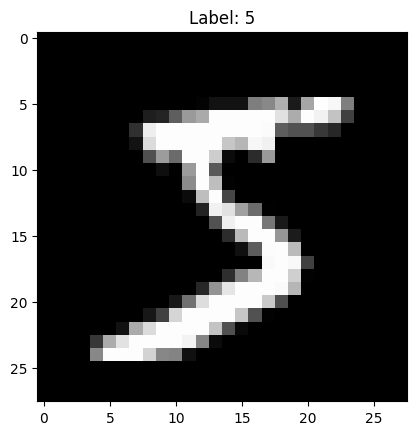

In [ ]:
import matplotlib.pyplot as plt

sample_index = 0  # Choose an index
sample_image = mnist.data[sample_index].reshape(28, 28)
sample_label = mnist.target[sample_index]

plt.imshow(sample_image, cmap='gray')
plt.title(f"Label: {sample_label}")
plt.show()

# 2. Train a Binary Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=42
)

y_train_5 = (y_train == '5')  # True for '5', False for others
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# 3. Evaluate Classifier Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return ['not-5'] * len(X)

never_5_clf = Never5Classifier()

sgd_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
never_5_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print(f"SGD Classifier Accuracy: {sgd_scores.mean()}")
print(f"Never 5 Classifier Accuracy: {never_5_scores.mean()}")

SGD Classifier Accuracy: 0.9669105953211604
Never 5 Classifier Accuracy: 0.0


# 4. Confusion Matrix Analysis

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
conf_mx = confusion_matrix(y_train_5, y_train_pred)

print("Confusion Matrix:")
print(conf_mx)

Confusion Matrix:
[[50287   673]
 [ 1180  3860]]
